In [1]:
from dataset import *
import matplotlib.pyplot as plt
from random import *
import cv2
import os

In [2]:
dataset_path = "/opt/ml/segmentation/input/data"
train_path = dataset_path + '/train_all.json'

In [3]:
# "Background":0, "General trash":1, "Paper":2, "Paper pack":3, "Metal":4, "Glass":5, "Plastic":6, "Styrofoam":7, "Plastic bag":8, "Battery":9, "Clothing":10)

In [4]:
train_dataset = CustomDataset(dataset_path, train_path, mode='train', transform=None)

loading annotations into memory...
Done (t=7.10s)
creating index...
index created!


In [5]:
cut_data_idx = 10  # 잘라붙여 증가시킬 class
cut_dataset = []
other_dataset = []
for i in range(len(train_dataset)):
    if cut_data_idx in set(train_dataset[i][1].flatten()):
        cut_dataset.append(train_dataset[i])
    else:
        other_dataset.append(train_dataset[i])

In [6]:
print(f"count : {len(cut_dataset)}")
for cut_data in cut_dataset:
    print(set(cut_data[1].flatten()))

count : 110
{0, 8, 10, 6}
{0, 10}
{0, 1, 2, 4, 6, 8, 10}
{0, 10}
{0, 10}
{0, 1, 10, 6}
{0, 10}
{0, 2, 6, 8, 10}
{0, 10}
{0, 8, 10, 2}
{0, 10}
{0, 1, 10}
{0, 10, 2, 5}
{0, 1, 5, 6, 10}
{0, 2, 10}
{0, 10}
{0, 1, 2, 6, 8, 10}
{0, 8, 10, 2}
{0, 2, 4, 6, 8, 10}
{8, 0, 2, 10}
{0, 2, 6, 9, 10}
{0, 10, 4}
{0, 10}
{0, 1, 2, 6, 10}
{0, 10}
{0, 3, 7, 8, 10}
{0, 10}
{0, 10}
{0, 1, 10, 2}
{0, 9, 10}
{0, 10}
{0, 10, 2, 4}
{0, 1, 10, 2}
{0, 10}
{0, 1, 2, 8, 10}
{0, 8, 10}
{0, 1, 2, 6, 8, 10}
{0, 1, 2, 6, 7, 8, 10}
{0, 2, 6, 8, 10}
{0, 1, 2, 6, 8, 10}
{0, 1, 2, 6, 7, 8, 10}
{0, 1, 2, 8, 10}
{0, 1, 2, 7, 8, 10}
{0, 2, 3, 6, 8, 10}
{0, 1, 6, 8, 10}
{0, 1, 7, 8, 10}
{0, 8, 10}
{0, 2, 7, 8, 10}
{0, 10}
{0, 1, 2, 7, 8, 10}
{0, 1, 2, 4, 7, 8, 10}
{0, 6, 7, 8, 10}
{0, 1, 2, 3, 4, 6, 7, 8, 10}
{0, 2, 4, 8, 10}
{0, 1, 2, 6, 8, 10}
{0, 1, 2, 6, 8, 10}
{0, 1, 2, 8, 10}
{0, 1, 2, 7, 8, 10}
{0, 1, 2, 3, 6, 7, 8, 10}
{0, 1, 2, 3, 6, 8, 10}
{0, 2, 6, 8, 10}
{0, 1, 2, 8, 10}
{0, 1, 3, 7, 8, 10}
{0, 1, 2, 3, 6, 8, 10}

In [7]:
# train_loader, val_loader = loadDataLoader("/opt/ml/segmentation/input/data")

In [8]:
def merge_image(insert_image, insert_mask, class_id, base_image=None, base_mask=None):
    """
    Args:
        insert_image: 추출하려고 하는 이미지
        insert_mask: 추출하려고 하는 이미지의 마스크
        class_id: 목적 class
        base_image: 배경이 되는 이미지
        base_mask: 배경이 되는 이미지의 마스크
    """
    tmp_img = np.ones((512,512,3), dtype=np.float32) * 255
    if type(base_image) is type(None):
        base_image = tmp_img.copy()
    tmp_img[:,:,0] = np.where(insert_mask == class_id, insert_image[:,:,0], base_image[:,:,0])  # R or B
    tmp_img[:,:,1] = np.where(insert_mask == class_id, insert_image[:,:,1], base_image[:,:,1])  # G
    tmp_img[:,:,2] = np.where(insert_mask == class_id, insert_image[:,:,2], base_image[:,:,2])  # B or R
    if type(base_mask) is type(None):
        base_mask = np.zeros((512,512), dtype=np.uint8)
    tmp_mask = np.where(insert_mask == class_id, insert_mask, base_mask)  # mask
    return tmp_img, tmp_mask.astype(np.uint8)

## Test

In [9]:
image1 = cut_dataset[1][0]  # 5, 6
mask1 = cut_dataset[1][1]
image2 = other_dataset[0][0]
mask2 = other_dataset[0][1]

### 1) 특정 class image & mask 추출 test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

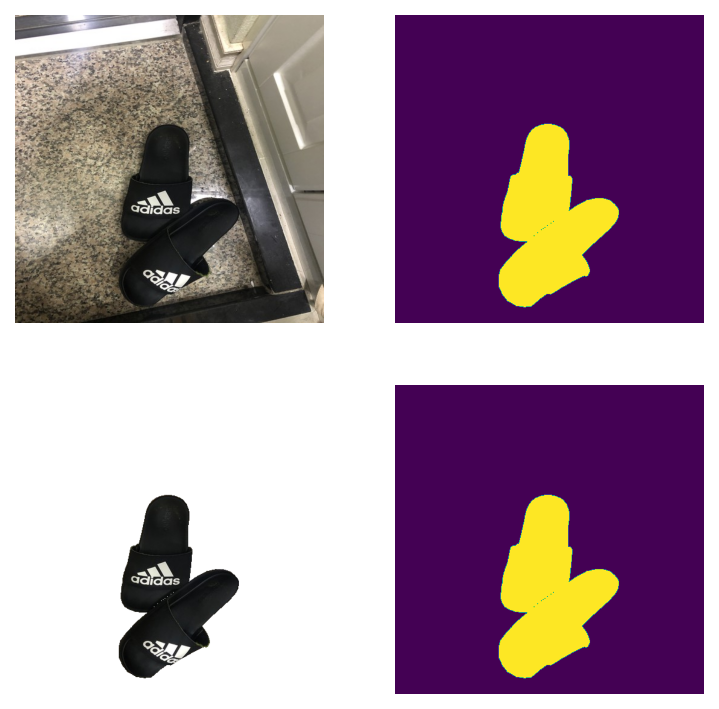

In [10]:
tmp_img, tmp_mask = merge_image(image1, mask1, cut_data_idx)
fig, axes = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
axes[0, 0].imshow(image1)
axes[0, 0].axis("off")
axes[0, 1].imshow(mask1)
axes[0, 1].axis("off")
axes[1, 0].imshow(tmp_img)
axes[1, 0].axis("off")
axes[1, 1].imshow(tmp_mask)
axes[1, 1].axis("off")

### 2) 합성 test

(-0.5, 511.5, 511.5, -0.5)

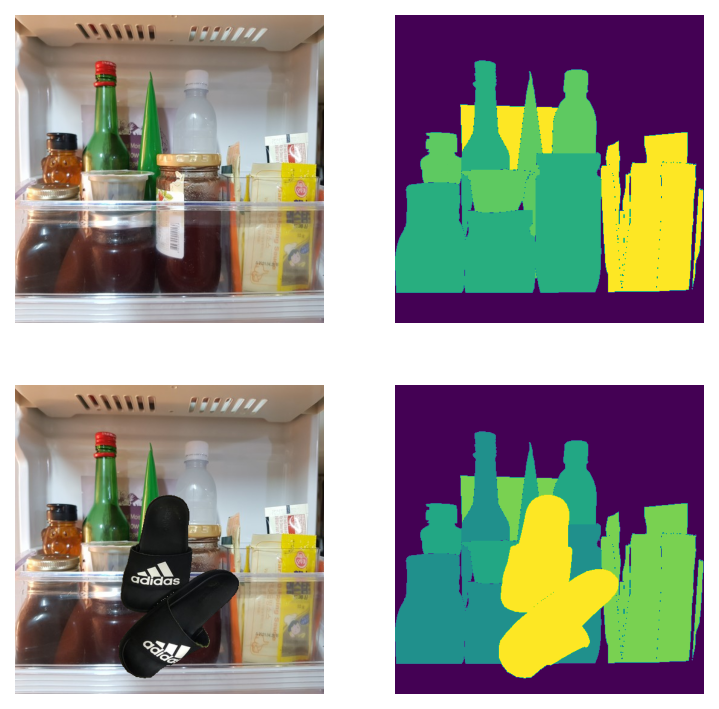

In [11]:
tmp_img, tmp_mask = merge_image(image1, mask1, cut_data_idx, base_image=image2, base_mask=mask2)
fig, axes = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
axes[0, 0].imshow(image2)
axes[0, 0].axis("off")
axes[0, 1].imshow(mask2)
axes[0, 1].axis("off")
axes[1, 0].imshow(tmp_img)
axes[1, 0].axis("off")
axes[1, 1].imshow(tmp_mask)
axes[1, 1].axis("off")

## 생성시작

In [12]:
new_images = []
new_masks = []
max_idx = len(other_dataset)
for cut_image_idx in range(len(cut_dataset)):
    for i in range(10):
        base_image_idx = randint(0, max_idx)
        tmp_img, tmp_mask = merge_image(
            cut_dataset[cut_image_idx][0],
            cut_dataset[cut_image_idx][1],
            cut_data_idx,
            base_image=other_dataset[base_image_idx][0],
            base_mask=other_dataset[base_image_idx][1]
        )
        new_images.append(tmp_img)
        new_masks.append(tmp_mask)

(-0.5, 511.5, 511.5, -0.5)

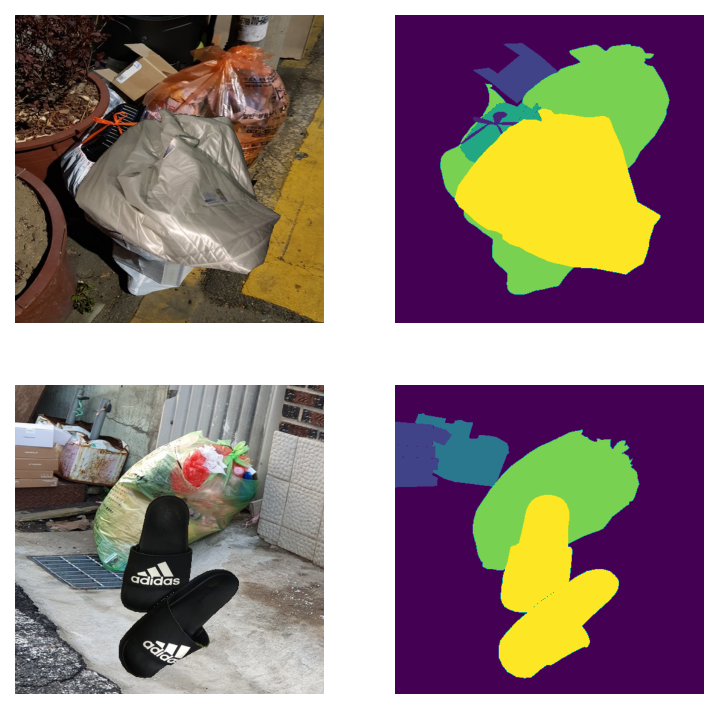

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
axes[0, 0].imshow(new_images[0])
axes[0, 0].axis("off")
axes[0, 1].imshow(new_masks[0])
axes[0, 1].axis("off")
axes[1, 0].imshow(new_images[12])
axes[1, 0].axis("off")
axes[1, 1].imshow(new_masks[12])
axes[1, 1].axis("off")

In [15]:
save_dir = "/opt/ml/segmentation/input/custom_data/clothes/image/"
mask_dir = "/opt/ml/segmentation/input/custom_data/clothes/mask/"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
if not os.path.isdir(mask_dir):
    os.makedirs(mask_dir)

In [16]:
for image_idx, image in enumerate(new_images):
    file_dir = save_dir+f"{image_idx:04}.jpg"
    cv2.imwrite(file_dir, image*255)

In [ ]:
# for image_idx, image in enumerate(new_masks):
#     file_dir = mask_dir+f"{image_idx:04}.png"
#     cv2.imwrite(file_dir, image)

In [1]:
import json

In [2]:
with open('train.json') as f:
    json_object = json.load(f)

In [22]:
json_object

dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])

In [26]:
json_object['annotations'][0]['segmentation']

[[184,
  455,
  183,
  455,
  182,
  455,
  181,
  455,
  181,
  454,
  180,
  454,
  180,
  453,
  179,
  453,
  179,
  452,
  178,
  452,
  178,
  451,
  177,
  451,
  177,
  450,
  176,
  450,
  176,
  449,
  175,
  449,
  175,
  448,
  174,
  448,
  174,
  447,
  173,
  447,
  172,
  447,
  172,
  446,
  171,
  446,
  171,
  445,
  170,
  445,
  170,
  444,
  169,
  444,
  169,
  443,
  168,
  443,
  168,
  442,
  167,
  442,
  167,
  441,
  166,
  441,
  166,
  440,
  166,
  439,
  165,
  439,
  165,
  438,
  164,
  438,
  164,
  437,
  163,
  437,
  163,
  436,
  163,
  435,
  162,
  435,
  162,
  434,
  161,
  434,
  161,
  433,
  160,
  433,
  160,
  432,
  159,
  432,
  158,
  432,
  157,
  432,
  156,
  432,
  155,
  432,
  154,
  432,
  153,
  432,
  152,
  432,
  152,
  431,
  151,
  431,
  150,
  431,
  149,
  431,
  148,
  431,
  147,
  432,
  147,
  432,
  146,
  433,
  146,
  433,
  145,
  433,
  145,
  432,
  144,
  432,
  143,
  432,
  143,
  431,
  142,
  431,
  141,

In [15]:
for mask_idx, mask in enumerate(new_masks):
    tmp_image = {
                "license": 0,
                "url": None,
                "file_name": f"image/{mask_idx:04}.jpg",
                "height": 512,
                "width": 512,
                "date_captured": None,
                "id": 0
            }
    tmp_segmentation = mask

NameError: name 'image_idx' is not defined